Online Shoppers Intention

#### Problem Statement:

Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  Analyse and compare the clusters formed with the existing Revenue Column.

#### Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

##### Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes.

The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 

The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 

Citation / Reference:

Please use the below link to cite this dataset:

Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).

https://link.springer.com/article/10.1007/s00521-018-3523-0

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

### Expected Approach/Outcomes:

Perform required cleaning to bring the uniformity in the data.

***Carry-out uni-variate, Bi-variate and Multti-varaiate analysis to understand the data relationships.***

***Perform required missing value treatment***

***Perform Outlier treatment if required***

***Perform appropriate scaling***

***Perform required encoding techniques***

***Build the different cluster models.***

***Analyse the optimum number of cluster using appropriate techniques.***

***Make the appropriate business interpretation using the cluster centroids.***

***Perform the EDA on cluster groups to understand the cluster characteristics.***

***Perform PCA and apply clustering on top of it. Comment whether PCA is really helping the clustering process. *** 

***Also try different graphs to visualize the clusters and its characteristics. ***


In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering 
import  warnings
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15,8]


In [22]:
df = pd.read_csv('online_shoppers_intention.csv')

In [23]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

In [ ]:
for i in df.columns:
    print(i,df[i].nunique())

In [ ]:
for i in df.columns:
    print(df[i].value_counts())

In [25]:
df['SpecialDay']=df['SpecialDay'].astype(object)
df['Month']=df['Month'].astype(object)
df['OperatingSystems']=df['OperatingSystems'].astype(object)
df['Browser']=df['Browser'].astype(object)
df['Region']=df['Region'].astype(object)
df['TrafficType']=df['TrafficType'].astype(object)
df['Weekend']=df['Weekend'].astype(object)

In [ ]:
df.info()

In [ ]:
df.head()

In [26]:
num_df= df.select_dtypes(include=np.number)
cat_df= df.select_dtypes(exclude=np.number)

In [ ]:
for i in num_df.columns:
    sns.boxplot(df[i])
    plt.show()

In [ ]:
for i in num_df.columns:
    sns.distplot(df[i])
    plt.show()

In [ ]:
for i in cat_df.columns:
    sns.countplot(df[i])
    plt.show()

In [ ]:
num_df.head(2)

In [ ]:
cat_df.head(2)

In [ ]:
sns.scatterplot(df['Administrative'],df['Administrative_Duration'])
plt.show()

In [ ]:
sns.scatterplot(df['Administrative'],df['Informational'])
plt.show()

In [ ]:
sns.scatterplot(df['Administrative'],df['Informational_Duration'])
plt.show()

In [ ]:
sns.scatterplot(df['Administrative'],df['ProductRelated'])
plt.show()

In [ ]:
sns.scatterplot(df['Administrative'],df['ProductRelated_Duration'])
plt.show()

In [ ]:
sns.scatterplot(df['Administrative'],df['BounceRates'])
plt.show()

In [ ]:
sns.scatterplot(df['Administrative'],df['ExitRates'])
plt.show()

In [ ]:
sns.scatterplot(df['Administrative'],df['PageValues'])
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(num_df.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

In [ ]:
sns.scatterplot(df['ProductRelated_Duration'],df['ProductRelated'])
plt.show()

In [ ]:
sns.scatterplot(df['BounceRates'],df['ExitRates'])
plt.show()

In [ ]:
num_df.columns

In [ ]:
cat_df.columns

In [ ]:
for j in num_df.columns:
    for i in cat_df.columns:
        sns.boxplot(y=df[j],x=df[i])
        plt.show()

In [ ]:
cat_df.head()

In [ ]:
for i in cat_df.columns:
    if i == 'Month':
        continue
    else:
        pd.crosstab(cat_df[i],cat_df['Month']).plot(kind='bar')
        plt.show()

In [ ]:
for i in cat_df.columns:
    if i == 'OperatingSystems':
        continue
    else:
        pd.crosstab(cat_df[i],cat_df['OperatingSystems']).plot(kind='bar')
        plt.show()

In [ ]:
for i in cat_df.columns:
    if i == 'Browser':
        continue
    else:
        pd.crosstab(cat_df[i],cat_df['Browser']).plot(kind='bar')
        plt.show()

In [ ]:
for i in cat_df.columns:
    if i == 'Region':
        continue
    else:
        pd.crosstab(cat_df[i],cat_df['Region']).plot(kind='bar')
        plt.show()

In [ ]:
for i in cat_df.columns:
    if i == 'TrafficType':
        continue
    else:
        pd.crosstab(cat_df[i],cat_df['TrafficType']).plot(kind='bar')
        plt.show()

In [ ]:
for i in cat_df.columns:
    if i == 'VisitorType':
        continue
    else:
        pd.crosstab(cat_df[i],cat_df['VisitorType']).plot(kind='bar')
        plt.show()

In [ ]:
for i in cat_df.columns:
    if i == 'Weekend':
        continue
    else:
        pd.crosstab(cat_df[i],cat_df['Weekend']).plot(kind='bar')
        plt.show()

In [ ]:
for i in cat_df.columns:
    if i == 'Revenue':
        continue
    else:
        pd.crosstab(cat_df[i],cat_df['Revenue']).plot(kind='bar')
        plt.show()

In [ ]:
cat_df.columns

In [ ]:
num_df.columns

In [ ]:
for j in cat_df.columns:
    for i in num_df.columns:
        if i == 'Administrative':
            continue
        else:
            sns.scatterplot(df[i],df['Administrative'],hue=df[j])
            plt.show()

In [ ]:
for j in cat_df.columns:
    for i in num_df.columns:
        if i == 'Administrative_Duration':
            continue
        else:
            sns.scatterplot(df[i],df['Administrative_Duration'],hue=df[j])
            plt.show()

In [ ]:
for j in cat_df.columns:
    for i in num_df.columns:
        if i == 'Informational':
            continue
        else:
            sns.scatterplot(df[i],df['Informational'],hue=df[j])
            plt.show()

In [ ]:
for j in cat_df.columns:
    for i in num_df.columns:
        if i == 'Informational_Duration':
            continue
        else:
            sns.scatterplot(df[i],df['Informational_Duration'],hue=df[j])
            plt.show()

In [ ]:
for j in cat_df.columns:
    for i in num_df.columns:
        if i == 'ProductRelated':
            continue
        else:
            sns.scatterplot(df[i],df['ProductRelated'],hue=df[j])
            plt.show()

In [ ]:
for j in cat_df.columns:
    for i in num_df.columns:
        if i == 'ProductRelated_Duration':
            continue
        else:
            sns.scatterplot(df[i],df['ProductRelated_Duration'],hue=df[j])
            plt.show()

In [ ]:
for j in cat_df.columns:
    for i in num_df.columns:
        if i == 'BounceRates':
            continue
        else:
            sns.scatterplot(df[i],df['BounceRates'],hue=df[j])
            plt.show()

In [ ]:
for j in cat_df.columns:
    for i in num_df.columns:
        if i == 'ExitRates':
            continue
        else:
            sns.scatterplot(df[i],df['ExitRates'],hue=df[j])
            plt.show()

In [ ]:
for j in cat_df.columns:
    for i in num_df.columns:
        if i == 'PageValues':
            continue
        else:
            sns.scatterplot(df[i],df['PageValues'],hue=df[j])
            plt.show()

In [ ]:
df.isnull().sum()

In [ ]:
for i in num_df.columns:
    sns.boxplot(num_df[i])
    plt.show()

In [27]:
def cap(s):
    q1= num_df[s].quantile(0.25)
    q3= num_df[s].quantile(0.75)
    iqr= q3 -q1
    ub= q3 + 1.5 * iqr 
    lb= q1 - 1.5 * iqr
    uc = num_df[s].quantile(0.90)
    lc = num_df[s].quantile(0.10)
    ind1=num_df[num_df[s] > ub].index
    ind2=num_df[num_df[s] < lb].index
    num_df.loc[ind1,s]=uc
    num_df.loc[ind2,s]=lc

In [28]:
len(df)

12330

In [ ]:
num_df.columns

In [29]:
cap('Administrative')
cap('Administrative_Duration')
cap('Informational')
cap('Informational_Duration')
cap('ProductRelated')
cap('ProductRelated_Duration')
cap('BounceRates')
cap('ExitRates')
cap('PageValues')

In [ ]:
len(df)

In [10]:
num_df.shape

(12330, 9)

In [30]:
cat_df = pd.get_dummies(data = cat_df, drop_first = True)

In [31]:
len(cat_df)

12330

In [33]:
len(X)

12330

In [41]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_feature'
num_scaled = X_scaler.fit_transform(num_df)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
num_df = pd.DataFrame(num_scaled, columns = num_df.columns)

# display first five observations
num_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.777194,-0.724807,-0.520831,-0.492257,-1.065954,-1.003477,2.331309,2.141662,-0.533268
1,-0.777194,-0.724807,-0.520831,-0.492257,-1.023068,-0.935891,-0.668051,2.141662,-0.533268
2,-0.777194,-0.724807,-0.520831,-0.492257,-1.065954,-1.003477,2.331309,2.141662,-0.533268
3,-0.777194,-0.724807,-0.520831,-0.492257,-1.023068,-1.000661,2.331309,2.141662,-0.533268
4,-0.777194,-0.724807,-0.520831,-0.492257,-0.679983,-0.340814,0.362710,0.464999,-0.533268


In [42]:
X = pd.concat([num_df, cat_df], axis = 1)

In [55]:
X= X.drop(columns='Revenue')

In [53]:
def k_val(x):
    inertia = [] #inertia (within cluster sum square) or total spread
    sil=[]
    for k in range(2,10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(x)
        inertia.append(kmeans.inertia_)
        sil.append(metrics.silhouette_score(x,kmeans.labels_))
    plt.plot(range(2,10), inertia, color='red',marker='D')
    plt.title('Graph of k values and WCSS')
    plt.xlabel('k values')
    plt.ylabel('wcss values')
    plt.show()

In [58]:
def agg(x,k):
    for y in ['euclidean','manhattan','cosine']:
        for z in ['average','complete','single','ward']:
            if z in 'ward':
                y='euclidean'
                m2 = AgglomerativeClustering(n_clusters=k, affinity=y,  linkage=z)
                m2.fit(x)
                print("silhouette_score for",y,'and',z,metrics.silhouette_score(x,m2.labels_)) 
                Z = linkage(x,method= z) 
                c, coph_dists = cophenet(Z , pdist(x))
                print("cophenet correlation for",y,'and',z,c)
            else:
                m2 = AgglomerativeClustering(n_clusters=k, affinity=y,  linkage=z)
                m2.fit(x)
                print("silhouette_score for",y,'and',z,metrics.silhouette_score(x,m2.labels_)) 
                Z = linkage(x,method= z) 
                c, coph_dists = cophenet(Z , pdist(x))
                print("cophenet correlation for",y,'and',z,c)

In [78]:
def plot(z,y,level=5):
    plt.figure(figsize=(18, 16))
    plt.title('Agglomerative Hierarchical Clustering Dendogram')
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    Z = linkage(X,method=y,metric=z)
    dendrogram(Z,leaf_font_size=10,leaf_rotation=90.0,truncate_mode='level',p=level)
    plt.tight_layout()

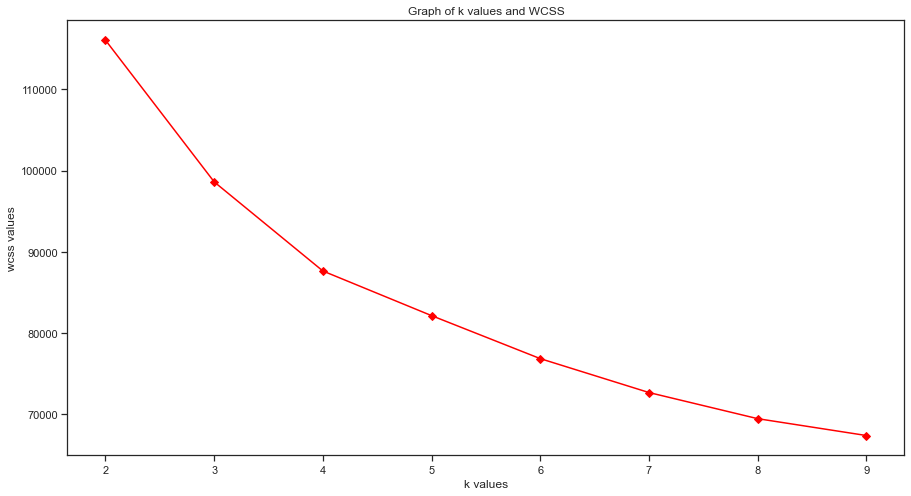

In [56]:
k_val(X)

In [80]:
agg(X,2)

silhouette_score for euclidean and average 0.2743934091176981
cophenet correlation for euclidean and average 0.7621276193764889
silhouette_score for euclidean and complete 0.24137078020257038
cophenet correlation for euclidean and complete 0.7031078450699093
silhouette_score for euclidean and single 0.21227763625251397
cophenet correlation for euclidean and single 0.6150418094106482
silhouette_score for euclidean and ward 0.2675703489297466
cophenet correlation for euclidean and ward 0.6910381923413437
silhouette_score for manhattan and average 0.2672141994175405
cophenet correlation for manhattan and average 0.7621276193764889
silhouette_score for manhattan and complete 0.26494193233823005
cophenet correlation for manhattan and complete 0.7031078450699093
silhouette_score for manhattan and single 0.2672141994175405
cophenet correlation for manhattan and single 0.6150418094106482
silhouette_score for euclidean and ward 0.2675703489297466
cophenet correlation for euclidean and ward 0.69

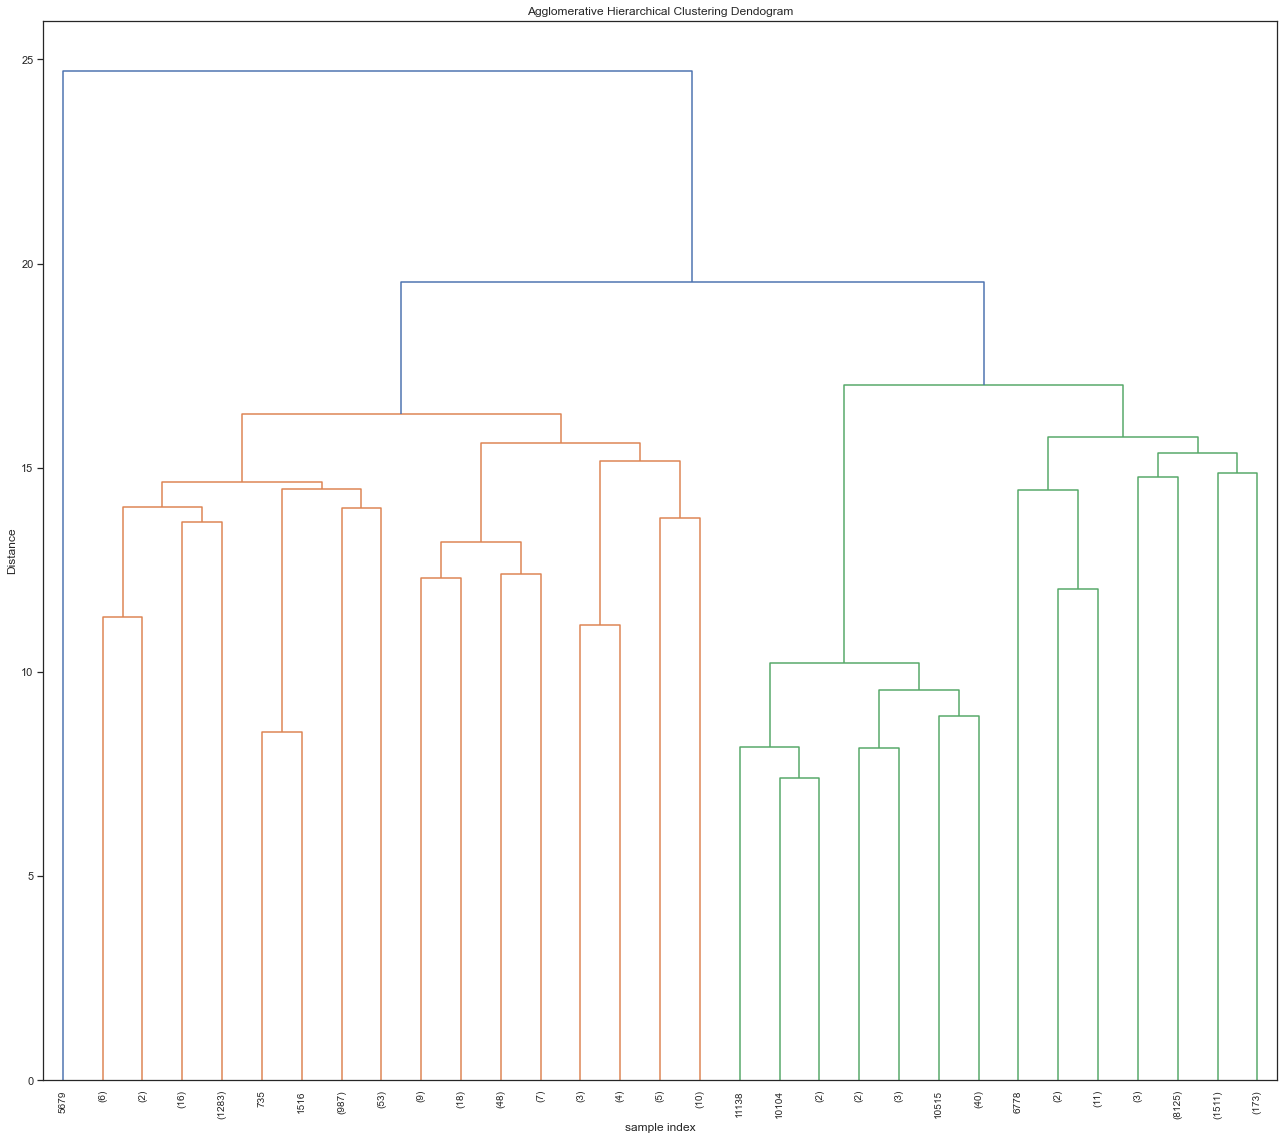

In [81]:
plot('cityblock','average')

In [70]:
cov_matrix = np.cov(X.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00008111  0.81589181  0.36213118 ... -0.00181691 -0.01786363
   0.01157841]
 [ 0.81589181  1.00008111  0.34001071 ... -0.0017819  -0.02466228
   0.01554135]
 [ 0.36213118  0.34001071  1.00008111 ... -0.00220495  0.01991763
   0.01841576]
 ...
 [-0.00181691 -0.0017819  -0.00220495 ...  0.00684679 -0.00589959
  -0.00103587]
 [-0.01786363 -0.02466228  0.01991763 ... -0.00589959  0.12347489
  -0.00585599]
 [ 0.01157841  0.01554135  0.01841576 ... -0.00103587 -0.00585599
   0.17851354]]


In [71]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-3.64305725e-01  2.31223501e-03  5.62235256e-01 ...  3.49308883e-04
  -2.62179225e-05  3.71111864e-18]
 [-3.44850210e-01 -4.74218484e-03  6.10440325e-01 ... -5.16262139e-04
   4.31947780e-05  2.87344447e-18]
 [-3.29916288e-01 -4.95205654e-01 -2.09649592e-01 ...  1.02058597e-04
  -4.62028979e-05 -2.27707378e-17]
 ...
 [ 1.60625404e-03  1.06115439e-03  1.26927497e-03 ... -2.36242332e-04
   9.43428140e-05  3.12632133e-16]
 [ 2.44271265e-03 -6.60950767e-02 -3.05139948e-02 ... -2.30871721e-04
   1.24046658e-05  1.28422076e-17]
 [-1.18359012e-02  4.17071507e-03 -2.24827553e-03 ...  1.71135088e-04
  -9.85576772e-06  2.31706265e-17]]

 Eigen Values 
%s [ 4.07656461e+00  1.53194969e+00  1.09256187e+00  1.05328268e+00
  7.48213431e-01  3.38215881e-01  2.90862503e-01  2.81780004e-01
  2.13701464e-01  2.00387982e-01  1.86982977e-01  1.79999830e-01
  1.74552817e-01  1.64007223e-01  1.43782999e-01  1.36064066e-01
  1.23134835e-01  9.93655204e-02  9.31774683e-02  7.93873386e-02
  

In [72]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.3305313   45.85595456  54.78888489  63.40066335  69.51815529
  72.28345305  74.66158334  76.96545391  78.71270533  80.35110397
  81.87990151  83.35160392  84.77877083  86.11971557  87.29530439
  88.40778218  89.41454888  90.22697451  90.98880581  91.63788719
  92.24050485  92.81135358  93.33395844  93.82661543  94.27307782
  94.68743254  95.06407496  95.42524045  95.75836133  96.07917921
  96.3688092   96.64799347  96.91539298  97.16186893  97.39824797
  97.62211011  97.82829929  98.02561915  98.21323346  98.39204878
  98.55504627  98.71585492  98.86744791  99.01649254  99.14551993
  99.25646637  99.35831501  99.45088975  99.53421935  99.60978693
  99.68469753  99.74198206  99.7833072   99.81190144  99.83862397
  99.86444659  99.88889808  99.91268175  99.93078111  99.94251121
  99.95356955  99.96273927  99.97129253  99.97852653  99.98508021
  99.99143454  99.99604361  99.99802269  99.99868401  99.99934214
 100.         100.        ]


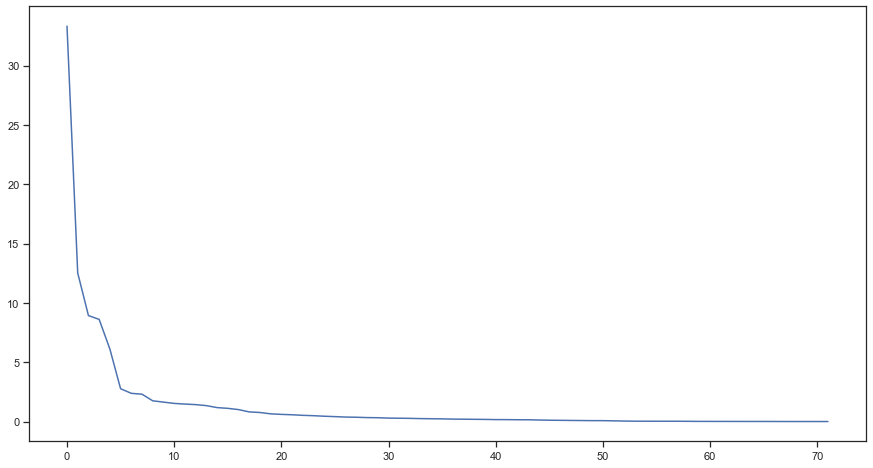

In [73]:
plt.plot(var_exp)

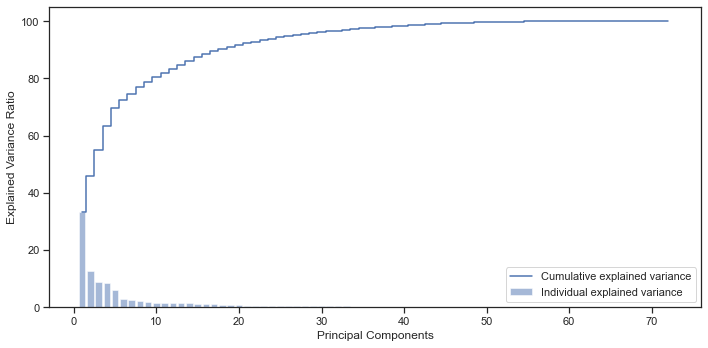

In [74]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()